# Exploring EEM - iShares MSCI Emerging Markets ETF

## FM - 5990 Semester Project

### Juan Andres Malaver

#### 04/02/2019

## Investment Strategy

**EEM** is an exchange-traded fund owned by BlackRock, Inc and traded in the United States. It focuses on mid-cap and large-cap equities by tracking the MSCI TR Emerging Markets Index. Most holdings are based in East Asian countries like China, Korea, and Taiwan, though there are considerable amounts of equity in India, Brazil, and South Africa. The four companies with the highest market cap in **EEM** are Tencent Holdings, Alibaba Group, Taiwan Semiconductors, and Samsung.

### Importing the `numpy` and `pandas` packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the data into various variables:

#### `df_upx` - underlying prices

In [2]:
df_upx = pd.read_csv('project_data/eem_upx.csv')
df_upx.head(10)

,date,open,high,low,close,volume,adjusted
0,2014-01-03,40.389999,40.400002,39.939999,40.119999,83579700,36.109550
1,2014-01-06,39.959999,39.959999,39.730000,39.740002,55735100,35.767544
2,2014-01-07,39.950001,40.090000,39.790001,39.910000,57341500,35.920547
3,2014-01-08,39.970001,40.009998,39.660000,39.779999,63182600,35.803539
4,2014-01-09,39.650002,39.720001,39.259998,39.570000,74405200,35.614525
5,2014-01-10,39.799999,40.419998,39.790001,40.270000,110244200,36.244556
6,2014-01-13,40.349998,40.400002,39.680000,39.790001,62209500,35.812546
7,2014-01-14,40.009998,40.340000,39.830002,40.220001,75830700,36.199558
8,2014-01-15,40.189999,40.310001,40.119999,40.209999,47361900,36.190556
9,2014-01-16,40.160000,40.259998,39.900002,39.990002,56673900,35.992554


#### `df_chain` - chain description

In [3]:
df_chain = pd.read_csv('project_data/eem_chain.csv')
df_chain.head()

,underlying,expiration,last_trade_date,execution,d2x,ret,realized_vol,implied_vol
0,EEM,2014-01-10,2014-01-10,2014-01-03,5,0.003732,0.168778,0.220364
1,EEM,2014-01-18,2014-01-17,2014-01-10,5,-0.011991,0.134197,0.189753
2,EEM,2014-01-24,2014-01-24,2014-01-17,4,-0.039734,0.305286,0.180510
3,EEM,2014-01-31,2014-01-31,2014-01-24,5,-0.001308,0.148695,0.299511
4,EEM,2014-02-07,2014-02-07,2014-01-31,5,0.014041,0.323357,0.285954


#### `df_trade` - trades

In [4]:
df_trade = pd.read_csv('project_data/eem_trade.csv')
df_trade.sort_values(['expiration', 'type'], inplace = True)
df_trade.head(25)

,underlying,expiration,execution,last_trade_date,type,strike,data_date,upx,bid,ask,delta
0,EEM,2014-01-10,2014-01-03,2014-01-10,call,41.0,2014-01-03,40.119999,0.13,0.15,0.222486
260,EEM,2014-01-10,2014-01-03,2014-01-10,put,39.5,2014-01-03,40.119999,0.23,0.26,0.301511
1,EEM,2014-01-18,2014-01-10,2014-01-17,call,41.0,2014-01-10,40.270000,0.14,0.16,0.242072
261,EEM,2014-01-18,2014-01-10,2014-01-17,put,39.5,2014-01-10,40.270000,0.14,0.17,0.241056
2,EEM,2014-01-24,2014-01-17,2014-01-24,call,40.5,2014-01-17,39.790001,0.09,0.12,0.216388
262,EEM,2014-01-24,2014-01-17,2014-01-24,put,39.5,2014-01-17,39.790001,0.21,0.24,0.360667
3,EEM,2014-01-31,2014-01-24,2014-01-31,call,39.0,2014-01-24,38.240002,0.25,0.29,0.299151
263,EEM,2014-01-31,2014-01-24,2014-01-31,put,37.5,2014-01-24,38.240002,0.34,0.37,0.325068
4,EEM,2014-02-07,2014-01-31,2014-02-07,call,39.0,2014-01-31,38.189999,0.19,0.23,0.267410
264,EEM,2014-02-07,2014-01-31,2014-02-07,put,37.5,2014-01-31,38.189999,0.31,0.34,0.323453


#### `df_pnl` - pnls for each trade

In [5]:
df_pnl = pd.read_csv('project_data/eem_pnl.csv')
df_pnl.sort_values(['expiration', 'strike', 'data_date'], inplace = True)
df_pnl.head(25)

,underlying,upx,expiration,type,strike,data_date,bid,ask,delta,dly_opt_pnl,dly_dh_pnl,dly_tot_pnl
1516,EEM,40.119999,2014-01-10,put,39.5,2014-01-03,0.23,0.26,0.301511,-0.03,0.000000,-0.030000
1517,EEM,39.740002,2014-01-10,put,39.5,2014-01-06,0.26,0.29,0.395441,-0.03,0.114573,0.084573
1518,EEM,39.910000,2014-01-10,put,39.5,2014-01-07,0.15,0.18,0.312578,0.11,-0.067224,0.042776
1519,EEM,39.779999,2014-01-10,put,39.5,2014-01-08,0.13,0.15,0.322042,0.03,0.040636,0.070636
1520,EEM,39.570000,2014-01-10,put,39.5,2014-01-09,0.17,0.21,0.459521,-0.06,0.067628,0.007628
1521,EEM,40.270000,2014-01-10,put,39.5,2014-01-10,0.00,0.00,0.000000,0.21,-0.321665,-0.111665
0,EEM,40.119999,2014-01-10,call,41.0,2014-01-03,0.13,0.15,0.222486,-0.02,0.000000,-0.020000
1,EEM,39.740002,2014-01-10,call,41.0,2014-01-06,0.03,0.04,0.085752,0.11,-0.084544,0.025456
2,EEM,39.910000,2014-01-10,call,41.0,2014-01-07,0.02,0.04,0.083717,0.00,0.014578,0.014578
3,EEM,39.779999,2014-01-10,call,41.0,2014-01-08,0.01,0.02,0.050355,0.02,-0.010883,0.009117


#### `df_vol_index` - volatility index

In [6]:
df_vol_index = pd.read_csv('project_data/eem_vol_index.csv')
df_vol_index.head(10)

,Date,Open,High,Low,Close
0,03/16/2011,29.18,34.32,28.53,32.86
1,03/17/2011,31.00,31.11,29.54,30.30
2,03/18/2011,29.18,30.10,27.73,29.59
3,03/21/2011,27.59,27.66,25.76,26.45
4,03/22/2011,26.17,26.17,25.23,25.50
5,03/23/2011,25.50,25.90,24.58,25.00
6,03/24/2011,24.45,24.77,23.41,23.68
7,03/25/2011,23.88,24.17,23.27,24.10
8,03/28/2011,25.34,25.34,24.03,24.26
9,03/29/2011,24.00,24.58,24.00,24.16


### Calculating Returns

In [7]:
df_upx['return'] = \
    np.log(df_upx['adjusted']) - np.log(df_upx['adjusted'].shift(1))
df_upx.head()

,date,open,high,low,close,volume,adjusted,return
0,2014-01-03,40.389999,40.400002,39.939999,40.119999,83579700,36.109550,NaN
1,2014-01-06,39.959999,39.959999,39.730000,39.740002,55735100,35.767544,-0.009516
2,2014-01-07,39.950001,40.090000,39.790001,39.910000,57341500,35.920547,0.004269
3,2014-01-08,39.970001,40.009998,39.660000,39.779999,63182600,35.803539,-0.003263
4,2014-01-09,39.650002,39.720001,39.259998,39.570000,74405200,35.614525,-0.005293


Here we are calculating log returns, which tend to be more accurate than arithmetic returns for ETF adjusted price returns. This is because it more closely resembles the Black-Scholes equation. It is important to remember the *leverage effect*: when the ETF incurs losses (ie when adjusted prices go down), there is greater volatility for daily returns.

### Adjusting date column

In [8]:
df_upx['date'] = pd.to_datetime(df_upx['date'])
df_upx.dtypes

date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume               int64
adjusted           float64
return             float64
dtype: object

Here we are changing the 'date' column from an object type to a date type, which allows easier analysis.

In [9]:
# printing the first and last dates
print(min(df_upx.date))
print(max(df_upx.date))

2014-01-03 00:00:00
2018-12-28 00:00:00


From this we know that the data ranges from 2014 to 2019 for the ETF analyzed.

### Realized Volatility

In [10]:
df_upx['realized_vol'] = \
    df_upx['return'].rolling(42).std() * np.sqrt(252)

Here we are calculating the realized volatility (rolling standard deviation) with a window size of two months (42 days).

### Implied Volatility - The VIX Index

Let's take a look at daily VIX levels for EEM from 2014 to 2018.

In [11]:
df_vol_index.head(10)

,Date,Open,High,Low,Close
0,03/16/2011,29.18,34.32,28.53,32.86
1,03/17/2011,31.00,31.11,29.54,30.30
2,03/18/2011,29.18,30.10,27.73,29.59
3,03/21/2011,27.59,27.66,25.76,26.45
4,03/22/2011,26.17,26.17,25.23,25.50
5,03/23/2011,25.50,25.90,24.58,25.00
6,03/24/2011,24.45,24.77,23.41,23.68
7,03/25/2011,23.88,24.17,23.27,24.10
8,03/28/2011,25.34,25.34,24.03,24.26
9,03/29/2011,24.00,24.58,24.00,24.16


Now we isolate the **'Close'** column, which is what we are interested in for our analysis.

In [12]:
df_vix = df_vol_index[['Date', 'Close']].copy()

In addition, we change the **'Date'** column from object to date and rename the **'Close'** column to **'vix'**.

In [13]:
df_vix['Date'] = pd.to_datetime(df_vix['Date'])
df_vix.set_index(['Date'], inplace = True)
df_vix.rename({'Close':'vix'}, axis = 'columns', inplace = True)

Finally, we merge de `df_upx` dataframe with our new `df_vix` dataframe.

In [14]:
df_upx = pd.merge(df_upx, df_vix, left_on=['date'], right_on=['Date'])

We can visualize all of these volatility measure on time series graphs:

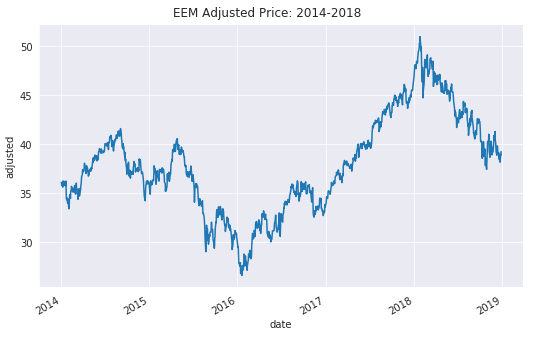

In [15]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='date', y='adjusted', kind='line', data=df_upx, aspect=1.5)
    g.fig.autofmt_xdate()
    g.fig.suptitle('EEM Adjusted Price: 2014-2018')
    plt.subplots_adjust(top=0.93);

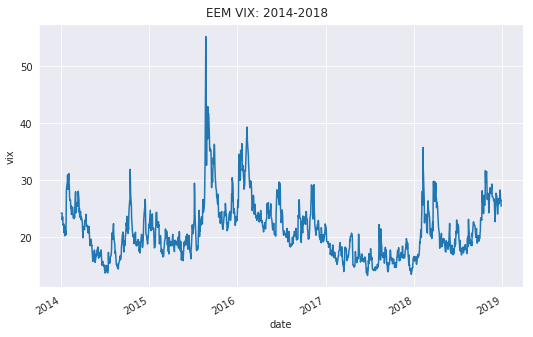

In [16]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='date', y='vix', kind='line', data=df_upx, aspect=1.5)
    g.fig.autofmt_xdate()
    g.fig.suptitle('EEM VIX: 2014-2018')
    plt.subplots_adjust(top=0.93);

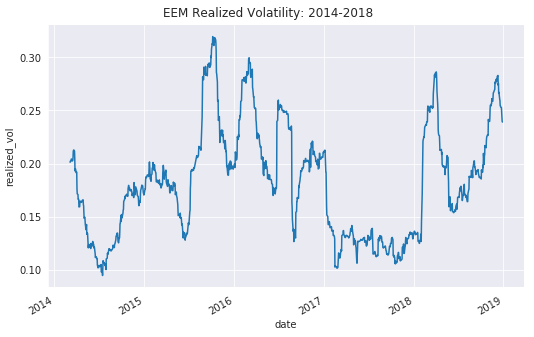

In [17]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='date', y='realized_vol', kind='line', data=df_upx, aspect=1.5)
    g.fig.autofmt_xdate()
    g.fig.suptitle('EEM Realized Volatility: 2014-2018')
    plt.subplots_adjust(top=0.93);

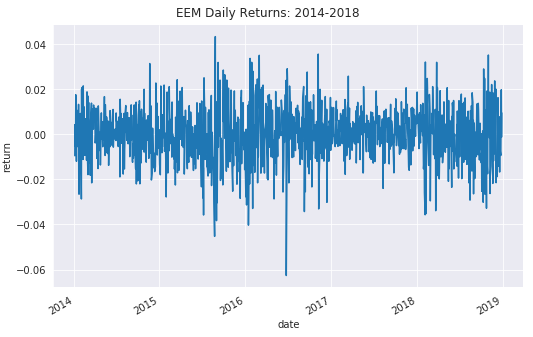

In [18]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='date', y='return', kind='line', data=df_upx, aspect=1.5)
    g.fig.autofmt_xdate()
    g.fig.suptitle('EEM Daily Returns: 2014-2018')
    plt.subplots_adjust(top=0.93);

The largest discrepancies between realized_vol and the vix can be seen between 2016 and 2017, where implied volatility tends to be much higher and volatile than the volatility index. There is also a notable spike at the beginning of 2018. Since EEM is mostly composed of Eastern Asian stocks, it can be inferred that uncertainties about the repercussions of the US-China Trade war under Donald Trump's presidency can generate turbulent markets in China and surrounding countries. As such, it creates larger gaps between implied vols and the vix. 2016-2017 and 2018-2019 saw significant market downturns which increase implied vols and vix, whereas 2017-2018 (when it seemed like the US and China were arriving at a deal) and the period before Trump saw market growth in the EEM index, reducing volatility during these periods.

### Wrangling PnL Data

Converting to date objects.

In [19]:
df_pnl['expiration'] = pd.to_datetime(df_pnl['expiration'])
df_pnl['data_date'] = pd.to_datetime(df_pnl['data_date'])

Extracting month and year to conduct aggregate analysis.

In [20]:
df_pnl['year'] = df_pnl['expiration'].dt.year
df_pnl['month'] = df_pnl['expiration'].dt.month

Grouping by month and year of expiration, we create a new dataframe that uses `numpy` to aggregate daily pnl into monthly/yearly data.

In [21]:
df_monthly =\
    df_pnl.groupby(['year', 'month'])['dly_tot_pnl'].agg([np.sum]).reset_index()
df_monthly.sort_values(['sum']).head(10)

,year,month,sum
49,2018,2,-2.173515
50,2018,3,-1.402374
19,2015,8,-1.025320
32,2016,9,-0.867588
29,2016,6,-0.746164
8,2014,9,-0.692927
57,2018,10,-0.571508
24,2016,1,-0.533472
55,2018,8,-0.491096
10,2014,11,-0.480370


Here we can identify the worst 10 months for EEM pnl. Now we will rename the column for **'sum'** to **'monthly_pnl'**.

In [22]:
df_monthly.rename(columns={'sum':'monthly_pnl'}, inplace=True)

We can identify the nature of these losses more clearly when visualizing it on a bar graph.

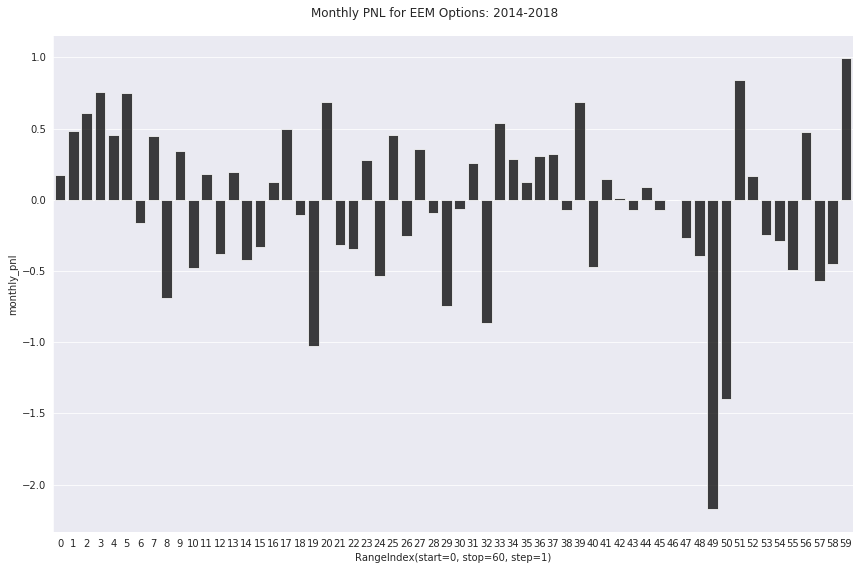

In [23]:
with sns.axes_style('darkgrid'):
    g = sns.catplot(
        x=df_monthly.index
        , y='monthly_pnl'
        , kind='bar'
        , color='black'
        , alpha=0.75
        , height=8
        , aspect = 1.5
        , data=df_monthly
    );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('Monthly PNL for EEM Options: 2014-2018');

This graph shows several trends. First of all, we can see that large losses are common between August and November for most years. This applies to some of our 10 lowest months for PNL. We can identify those months between 9-10 to be of low PNL for systematic reasons. This can be because of earnings reports for the companies within EEM, especially Q2 and Q3, which tend to be weaker for the companies within EEM. 2015-8, 2019-9, 2014-9, 2018-10, 2018-8, and 2014-11. We can classify these months as systematic. To further elaborate, emerging markets usually depend on export industries, as these nations tend to have trade surpluses and the largest companies depend on external demand for their products. Since Q2 and Q3 tend to be weaker in terms of import consumption in developed countries, because it is not Holiday season and because savings tend to be higher than investment during these months. Q4 earning reports tend to be stronger, so PNL during the beginning of the year will be higher for EEM equities. There are two major world events that lean away from this cyclical trend however. First is the slowdown of the Asian economy in 2016. This can explain the idiosyncracy of 2016-1 and 2016-6. Lower expectations of economic growth for these nations lowered demand for their largest companies. Lower commodity prices contributed to this significantly, which affects emerging markets around the world, especially economies like Brazil and South Africa that heavily depend on commodity exports. Donald Trump's election in the United States brought about increased volatility for emerging market companies. This is especially relevant in terms of the Us-China trade war. Major tariff events occurred in the first months of 2018, as the US and China mutually imposed tariffs on several traded goods and services between their economies. This explains the severe drop that we see in 2018-2 and 2018-3, where both nations threatened to further isolate their economies to protect their domestic industries. As these are the largest two economies in the world, this shakes global markets, and especially emerging markets within EEM.

### The Leverage Effect

Now we will calculate the daily change in the VIX and in the Realized Volatility calculated earlier.

In [24]:
df_upx['vix_chng'] = df_upx['vix'] - df_upx['vix'].shift(1)
df_upx['vol_chng'] = df_upx['realized_vol'] - df_upx['realized_vol'].shift(1)

Since we will be comparing these cahnges against returns, we must divide by 100 to compared within the similar decimal proportions.

In [25]:
df_upx['vix'] = df_upx['vix'] / 100
df_upx['vix_chng'] = df_upx['vix_chng'] / 100

Now we will regress these daily changes against return to attempt to find a relationship betweeen the variables.

#### VIX vs Returns

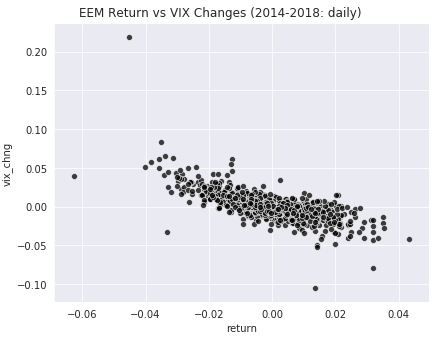

In [36]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(
            x='return'
            , y='vix_chng'
            , data=df_upx
            , color = 'black'
            , alpha = 0.75
            , height=4.75
            , aspect=1.3
        );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('EEM Return vs VIX Changes (2014-2018: daily)');

This implies that larger changes in the daily VIX imply lower daily returns, as the VIX represents the volatilty of the ETF

#### Realized Volatility vs Returns

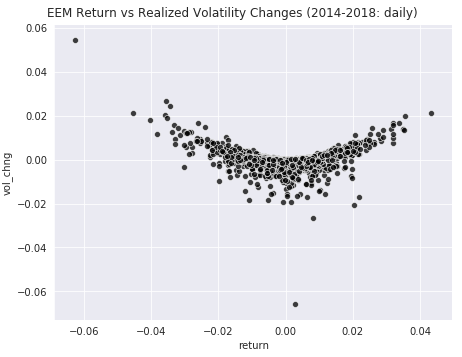

In [29]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(
            x='return'
            , y='vol_chng'
            , data=df_upx
            , color = 'black'
            , alpha = 0.75
            , height=5 
            , aspect=1.3
        );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('EEM Return vs Realized Volatility Changes (2014-2018: daily)');

This graph implies that negative changes in the realized volatility lead to daily returns close to 0, whereas postive changes in realized volatilty tend towards large daily returns in absolute values (positive or negative). Thus we find a quadratic relationship between the two variables.